# End-of-Workshop Project
<br>

# Project 2: Spotify Data Exploration
---
<br>

##### Programming Workshop for Scientists in Africa <www.pwsafrica.org>. 
##### Supported by the School of Computing Science, University of Glasgow.
##### Funded by the Global Challenges Research Fund and Scottish Funding Council.
<br>

##### PWSA2021. Python 3.x

## Background

Rolling Stone is an American monthly magazine that focuses on popular culture and it has released a list of 500 greatest hits of all times. But what songs are in there? Why are they great? What are their characteristics? 

Luckily when it comes to music, Spotify got the answers, so we've downloaded some information from there. For each song, we have artist, producer, year, etc information but we also have access to information about the following song aspects such as danceability, energy, instrumentalness, key, loudness, etc.  

We are going to analyse some of those characteristics throughout this project. 

*Special thanks to William Traynor for coming up with the idea and some of the exercises.*

In [2]:
# This cell just consists of imports you will need.

import numpy as np
import pandas as pd

from IPython.display import display, HTML

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

## Load the data

Since initial processing of the data involves some use of dataframes and we haven't done that, we are going to do this for you. 


In [3]:
# The code below will just load in our data and format so that
# it only contains data useful for the following exercise.

df = pd.read_excel("rollingstone.xlsx")
df = df.sort_values(by='Title')

### Side note: Dataframes

Another popular way of manipulating data in Python (although not as scalable as numpy arrays) is using a dataframe. Dataframes unlike arrays can store multiple datatypes. You can see the dataset stored in a dataframe and printed in a friendly manner in the cell below. 

The operations we've seen before, like indexing,subsetting, using functions like sum, mean, etc are also available for data frames. 

**For the purposes of this project you are not required to have a full understanding of dataframes as most of the dataframe operations have been performed for you**

In [4]:
display(HTML(df.to_html()))

,Artist,Title,Writers,Producer,Year,Spotify id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
499,Blue Öyster Cult,(Don't Fear) the Reaper,Donald Roeser,"Murray Krugman, Sandy Pearlman, David Lucas",76,5QTxFnGygVM4jFQiBovmRo,77,0.333,0.9270,9,-8.550,0,0.0733,0.002900,0.000211,0.2970,0.3820,141.470,audio_features,5QTxFnGygVM4jFQiBovmRo,spotify:track:5QTxFnGygVM4jFQiBovmRo,https://api.spotify.com/v1/tracks/5QTxFnGygVM4...,https://api.spotify.com/v1/audio-analysis/5QTx...,308120,4
498,The Rolling Stones,(I Can't Get No) Satisfaction,"Mick Jagger, Keith Richards",Andrew Loog Oldham,65,2PzU4IB8Dr6mxV3lHuaG34,79,0.723,0.8630,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.9310,136.302,audio_features,2PzU4IB8Dr6mxV3lHuaG34,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,https://api.spotify.com/v1/audio-analysis/2PzU...,222813,4
497,Otis Redding,(Sittin' on) the Dock of the Bay,"Redding, Steve Cropper",Cropper,68,3zBhihYUHBmGd2bcQIobrF,76,0.769,0.3670,2,-11.226,1,0.0312,0.684000,0.000016,0.0810,0.5350,103.621,audio_features,3zBhihYUHBmGd2bcQIobrF,spotify:track:3zBhihYUHBmGd2bcQIobrF,https://api.spotify.com/v1/tracks/3zBhihYUHBmG...,https://api.spotify.com/v1/audio-analysis/3zBh...,163756,4
496,Bill Haley and His Comets,(We're Gonna) Rock Around the Clock,"Jimmy DeKnight, Max Freedman",Milt Gabler,54,1uRKT2LRANv4baowBWHfDS,63,0.811,0.8590,9,-6.317,1,0.1680,0.205000,0.000004,0.0761,0.7840,90.686,audio_features,1uRKT2LRANv4baowBWHfDS,spotify:track:1uRKT2LRANv4baowBWHfDS,https://api.spotify.com/v1/tracks/1uRKT2LRANv4...,https://api.spotify.com/v1/audio-analysis/1uRK...,129893,4
495,Elvis Costello and the Attractions,"(What's So Funny About) Peace, Love and Unders...",Nick Lowe,Lowe,79,2jHodbcqnYrEqa59df2aKE,17,0.687,0.5850,7,-7.442,1,0.0314,0.064500,0.926000,0.2310,0.7940,123.349,audio_features,2jHodbcqnYrEqa59df2aKE,spotify:track:2jHodbcqnYrEqa59df2aKE,https://api.spotify.com/v1/tracks/2jHodbcqnYrE...,https://api.spotify.com/v1/audio-analysis/2jHo...,195333,4
494,The Clash,(White Man) In Hammersmith Palais,"Mick Jones, Joe Strummer",The Clash,79,45xBWOa6oEAk1WlVyr5QAB,49,0.692,0.7020,9,-6.399,1,0.0369,0.131000,0.000006,0.0855,0.8310,102.768,audio_features,45xBWOa6oEAk1WlVyr5QAB,spotify:track:45xBWOa6oEAk1WlVyr5QAB,https://api.spotify.com/v1/tracks/45xBWOa6oEAk...,https://api.spotify.com/v1/audio-analysis/45xB...,240560,4
493,Jackie Wilson,(Your Love Keeps Lifting Me) Higher and Higher,"Gary Jackson, Raynard Miner, Carl Smith",Carl Davis,67,4TBBPZks71c60whhq0PgdP,70,0.631,0.6900,2,-6.676,1,0.0531,0.176000,0.000000,0.1210,0.9380,94.574,audio_features,4TBBPZks71c60whhq0PgdP,spotify:track:4TBBPZks71c60whhq0PgdP,https://api.spotify.com/v1/tracks/4TBBPZks71c6...,https://api.spotify.com/v1/audio-analysis/4TBB...,181067,4
492,Prince,1999,Prince,Prince,82,2H7PHVdQ3mXqEHXcvclTB0,69,0.866,0.7300,5,-8.201,1,0.0767,0.137000,0.000000,0.0843,0.6250,118.523,audio_features,2H7PHVdQ3mXqEHXcvclTB0,spotify:track:2H7PHVdQ3mXqEHXcvclTB0,https://api.spotify.com/v1/tracks/2H7PHVdQ3mXq...,https://api.spotify.com/v1/audio-analysis/2H7P...,379267,4
491,and the Mysterians,96 Tears,Rudy Martinez,Martinez,66,4PEeZ2U4UfP2Jo8EtIOjus,55,0.650,0.5620,7,-5.965,1,0.0345,0.062400,0.000032,0.0760,0.8820,123.674,audio_features,4PEeZ2U4UfP2Jo8EtIOjus,spotify:track:4PEeZ2U4UfP2Jo8EtIOjus,https://api.spotify.com/v1/tracks/4PEeZ2U4UfP2...,https://api.spotify.com/v1/audio-analysis/4PEe...,176867,4
490,Jay-Z,99 Problems,"Jay-Z, Rick Rubin",Rubin,3,7sLpSWxQazJzDVG6YGzlVs,62,0.494,0.8870,6,-4.297,0,0.3980,0.006610,0.000000,0.1030,0.5480,89.554,audio_features,7sLpSWxQazJzDVG6YGzlVs,spotify:track:7sLpSWxQazJzDVG6YGzlVs,https://api.spotify.com/v1/tracks/7sLpSWxQazJz...,https://api.spotify.com/v1/audio-analysis/7sLp...,234627,4


In [5]:
songs = np.array(df['Title']) #we've talked mostly about numerical arrays but here we have an array of strings
artists = np.array(df['Artist']) #same as above
columns = {name.lower(): index for index, name in enumerate(df.columns[6:17])}


details = np.array(df[['Artist','Writers','Producer','Year','duration_ms']])

#Consists of all the sound variables which we can use to compare songs: e.g danceability, energy, loudness, liveness,etc
song_data = np.array(df.iloc[:,6:17])

# Normalise our analytics data so that all values are between 0 and 1.
# This is required as it will give better results because the analytics given are not all on
# the same metric so this will cause skewed results

a_min = np.amin(song_data, axis=0)
a_max = np.amax(song_data, axis=0)

normalized_data = 10*(song_data - a_min)/(a_max - a_min)

song_data = normalized_data



## Plot the data

When you run the cell below you will be shown a 2D Histogram of the song data

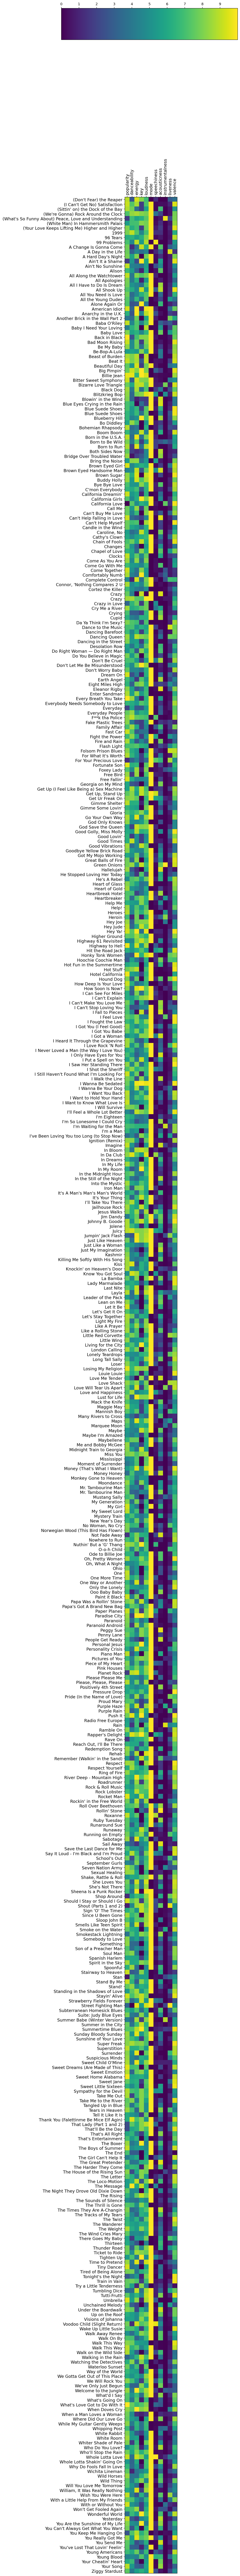

In [6]:
# show a plot of the  data
fig = plt.figure(figsize=(25,125))
ax = fig.add_subplot(1,1,1)

# image plot
img = ax.imshow(song_data)
ax.set_yticks(np.arange(len(songs)))
ax.set_yticklabels(songs, rotation="horizontal", fontsize=12)

# put the x axis at the top
ax.xaxis.tick_top()
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns, rotation="vertical", fontsize=12)


'''
The code below used to format the colour bar correctly was taken from Lab 4 in Data Fundamentals
Written by John Williamson
'''

# some horrific colorbar hackery to put in the right place
# don't worry about this bit!
cbaxes = fig.add_axes([0.37, 0.93, 0.28, 0.01])  
fig.colorbar(img, 
             orientation='horizontal', 
             cax=cbaxes, 
             ticks=np.arange(10)
            )
cbaxes.xaxis.tick_top()

### Data you can use.

You have the following variables at your disposal.

* `songs` - List of 500 song titles.
* `artists` - List of the 500 artist names for the songs.
* `song_data`  - 500x11 array of the metrics used to analyse songs i.e. loudness, danceability etc.

Order of columns in `song_data` as follows: 
   
     'Popularity'  'danceability'  'energy' 'key' 'loudness' 'mode',
       'speechiness'  'acousticness   'instrumentalness'  'liveness',
       'valence'


Examples:

In [7]:
# This will tell you how danceable 50 Cents' 'In Da Club' is.

song_data[songs.searchsorted('In Da Club'),
          columns['danceability']]

9.466192170818506

In [8]:
# This will tell you the 276th song.

songs[276]

'My Sweet Lord'

In [9]:
# This will tell you who sings the 276th song.

artists[276]

'George Harrison'

In [10]:
# This will tell you who sings 'Sweet Home Alabama'

artists[songs.searchsorted('Sweet Home Alabama')]

'Lynyrd Skynyrd'

In [11]:
# This will give you the song_data for 'Spirit in the Sky'

song_data[songs.searchsorted('Spirit in the Sky')]

array([ 8.55421687,  5.99051008,  6.16415756,  8.18181818,  7.59308044,
       10.        ,  0.15259142,  1.00501159,  0.04257113,  0.98880203,
        5.35616726])

## Task A: Retrieving data

1. (i) Find the songs in the positions; `4`, `16`, `89`, `136`, `276`, `345`, `399`, `412`, `489`

   (ii) Find the `name of the artists` who sing these songs.
   
   (iii) Create a `function` that, when given an `index`, will print the `name of the song and the artist`. 


In [12]:
#YOUR CODE GOES HERE

2. (i) Print the `first 100 songs` as a numpy array.
   
   (ii) Print the `final 200 songs` as a numpy array.
 

In [13]:
#YOUR CODE GOES HERE

3. (i) Print the song that is best to `dance` to.

   (ii) Print the song that is the `least acoustic`.
   
   (iii) Print the song that is `least instrumental`.
   
   (iv) Print the song with the `most energy`.
   
   


In [14]:
#YOUR CODE GOES HERE


4.   (i) Print all songs with a `daceability more than 0.4`.
   
     (ii) Print all songs with a `valence less than 0.5`.
   
     (iii) Print all songs where the `mode is equal to 1`.

In [15]:
#YOUR CODE GOES HERE

5. Create a `function` which, when given an `artists name`, will return the `average sound for that artist`. 
  
  Print the `average sound` for all songs by 'Bob Dylan'.


In [16]:
# YOUR CODE GOES HERE



## Task B: Visualising data
Hint: Do not forget the good practices for generating plots: e.g. labels, titles, etc


1. Write a function that when passed a metric (e.g loudness, danceability), generates a distribution plot for that metric and saves it as a png. 

What are the different plots we've used to visualise distributions? Which one is the most suitable in this case? Why?

In [17]:
#YOUR CODE GOES HERE

2. Write a function that when passed a metric, plots it against popularity and saves the plot as png

Can you see any interesting relationships between any of those metrics and popularity? Give examples.

In [18]:
#YOUR CODE GOES HERE

## (Optional) Can we predict if a song is going to be popular?
---

Currently, songs have different popularity scores. However, to make the task easier, we are just going to predict whether a song is popular or not. 

We define song as popular if it has a popularity score greater than 70 and we are going to use the same metric as earlier to predict popularity. 

In [19]:
import pandas as pd
import numpy as np

pop_df = pd.read_csv('popularity_predictor_data.csv')
pop_df = pop_df.sort_values('song_popularity').drop_duplicates()

In [20]:
pop_df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10479,Forastero,0,267687,0.212000,0.591,0.826,0.000000,9,0.1070,-5.899,0,0.2430,173.823,4,0.8430
9995,Trouble Adjusting,0,222933,0.011000,0.363,0.824,0.000000,4,0.1050,-3.316,1,0.0405,118.660,4,0.1640
4014,Saturday Night's Alright For Fighting,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.7200
18551,Many Lives,0,286066,0.183000,0.637,0.749,0.088300,6,0.1530,-5.659,1,0.0310,99.973,4,0.3340
4017,Teddy Picker,0,165000,0.000286,0.637,0.963,0.000889,9,0.0449,-5.116,1,0.0882,150.100,4,0.8230
4018,Back for More,0,202560,0.000007,0.452,0.996,0.000002,9,0.2200,-2.342,1,0.1140,152.010,4,0.1680
4022,Show Me the Way,0,186026,0.001420,0.549,0.935,0.000000,2,0.2950,-3.350,1,0.0545,150.053,4,0.7810
9982,Hold Us Together,0,221322,0.026700,0.447,0.812,0.000000,0,0.1320,-5.356,1,0.0609,145.163,4,0.4650
4030,Ludacris,0,183771,0.027700,0.792,0.747,0.000000,11,0.1170,-8.753,0,0.3420,94.498,4,0.5840
1233,Transformer (feat. Nicki Minaj),0,196333,0.001510,0.753,0.616,0.000007,2,0.2910,-7.340,1,0.1650,156.830,4,0.2870


In [21]:
songs = pop_df[['song_name', 'song_popularity']]

# We will take popular songs to be that which have a popularity rating greater than 70

songs['popular'] = songs['song_popularity'] > 70


/Users/alexpancheva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
song_columns = ['song_name','song_popularity','popular']

data_columns = ['acousticness','danceability','energy','instrumentalness','key','liveness','speechiness','tempo','audio_valence']

data_df = pop_df[data_columns]

song_analysis_data = np.array(data_df)

# Normalise our analytics data so that all values are between 0 and 1.
# This is required as it will give better results because the analytics given are not all on
# the same metric so this will cause skewed results

a_min = np.amin(song_analysis_data, axis=0)
a_max = np.amax(song_analysis_data, axis=0)

normalized_data = (song_analysis_data - a_min)/(a_max - a_min)

song_analysis_data = normalized_data


Task: Before we can do any machine learning, we need to split the data into training and testing. We did that in Week2Track1, Lab 2

In [ ]:
# YOUR CODE GOES HERE



Task: Now, initialise the algorithm you wish to use. Fit the algorithm on your training data and predict for your test points. Maybe try KNN or any of the classification algorithms we've covered in Week2Track1, Day2. 

This is a good time to start thinking how you are going to evaluate your results. What are the metrics we've covered? Which one would it be suitable in this case?


In [ ]:
#YOUR CODE GOES HERE